In [ ]:
# riboswitch and ribosnitch strategy --- ---

In [8]:
from utils_analysis import run_BMM_v2,run_2sample_clustering_analysis, get_flip_order, plot_inferred_proportions, plot_predicted_cluster_profile_3_NEW_manual_flip
from bmm_numba import BMMsNumba
from method_bmm_numba import BMMsNumba  

In [ ]:
## 1. Supp_Figure_5a_5b_5c_5d ---  --- 

In [11]:
def run_global_analysis_mod_flt_0(p_genes, p_clusters, p_start=None, p_end=None, p_min_samples=1000, p_local=False, p_seed=386, p_method="dtw",p_prop=None):
    
    if p_method == "dtw":       
        
        f_dir = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/"
        f_mtxs = [f_dir + "Noligand/"+p_genes[0]+"_binary.mtx",
                  f_dir + "Ligand/"+p_genes[0]+"_binary.mtx"]
        f_ids = [f_dir + "Noligand/"+p_genes[0]+"_binary.iids.gz",
                 f_dir + "Ligand/"+p_genes[0]+"_binary.iids.gz"]

    f_sizes = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/reference_of_ribosxitch_v2.sizes"

    if p_start is not None and p_end is not None:
        p_length = None
    else:
        p_length = -1
    
    results  = run_2sample_clustering_analysis(f_mtxs, f_ids, p_genes, f_sizes, 
                                                p_depth=-1, p_length=p_length, p_start=p_start, p_end=p_end, 
                                                p_threshold_len_prop=0.85, p_verbose=True, 
                                                f_likelihood=None, p_clusters=p_clusters,
                                                p_no_of_runs=1,
                                                p_threshold=0.5,  #0.5, #0.0001,
                                                p_min_iters=20, #20 #300,
                                                p_seed=p_seed,
                                                p_min_samples=p_min_samples,
                                                p_unknown=0.00, 
                                                p_pos_modrate_low=0.0, p_pos_modrate_high=1.0,
                                                p_read_modrate_low=0.0075, p_read_modrate_high=0.025,
                                                p_visualize=True, p_impute=False, p_local=p_local,p_prop=p_prop)
    return results



def get_sizes(f_sizes):
    sizes = {}
    with open(f_sizes, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            sizes[row[0]] = int(row[1])
    return sizes


### 2 sample clusters ---
### flip version      ---
    

def BMM_plots_truncate_mod_0_flip(gene1, gene2,p_min_samples,prop):

    f_sizes = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/Data/reference_of_ribosxitch_v2.sizes"
    sizes = get_sizes(f_sizes)
    full_size = sizes[gene1]
    end = full_size-25

    p_genes = [gene1, gene2]
    p_clusters = 2
    p_min_samples = p_min_samples
    p_start, p_end = 25, end
    p_local = False
    p_prop = prop

    model, results, params, new_X = run_global_analysis_mod_flt_0(p_genes, p_clusters, 
                                                                  p_start=p_start,
                                                                  p_end=p_end,
                                                                  p_min_samples=p_min_samples,
                                                                  p_local=p_local,
                                                                  p_prop=p_prop)
                                                    
    flip_order = get_flip_order(new_X, results, params)
    plot_inferred_proportions(new_X, results, params, flip_order)
    plot_predicted_cluster_profile_3_NEW_manual_flip(new_X, results, params) 

(46281, 3)
46281
(53700, 3)
53700
25 621 15341 15806
15341
(30645, 596)
(15341, 596)
(15341, 596)
(46281, 3)
46281
(53700, 3)
53700
0 646 15341 15806
15341
(30652, 646)
(15341, 646)
(15341, 646)
(10801, 596) (12042, 596)
(10801, 596) (12042, 596)
(1000, 596) (1000, 596)
Current Run: 0
Best Model - Run 0
[[73.13253012 33.58974359]
 [26.86746988 66.41025641]]
[[33.58974359 66.41025641]
 [73.13253012 26.86746988]]
33.589743589743584 33.589743589743584 0.5
66.41025641025641 100.0 0.5
73.13253012048193 73.13253012048193 1.5
26.867469879518076 100.0 1.5
2000
WT: 830 | MT: 1170 | UN: 0
UN WT: 0 | UN MT: 0
(607, 646)
(223, 646)
(777, 646)
(393, 646)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7789: Sett

(607, 646)
(223, 646)
(777, 646)
(393, 646)
Counter({True: 607, False: 223})
Counter({True: 777, False: 393})
0.692
(607, 646)
(223, 646)
(777, 646)
(393, 646)
0.7627265910897129
0.7138946090835689
0.8703772017707166
0.15932880727214024
0.9800977104781696
0.9466425464140296
0.9610341908731141
0.11467669478795271


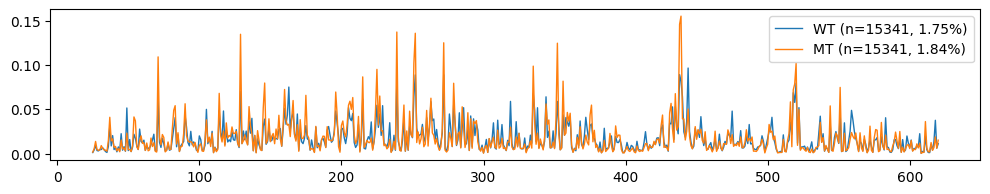

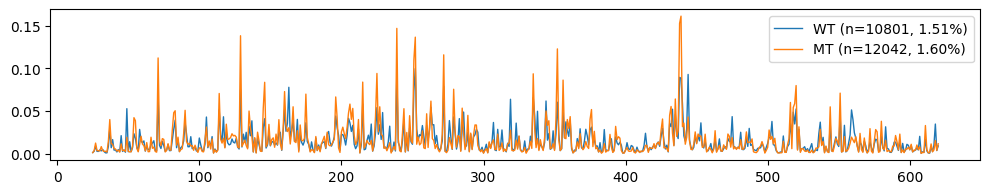

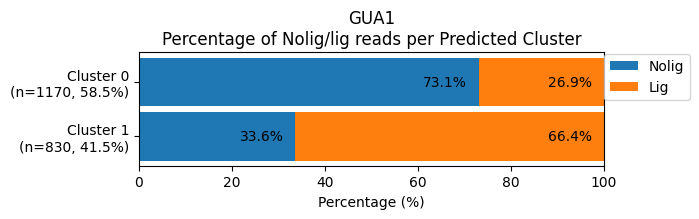

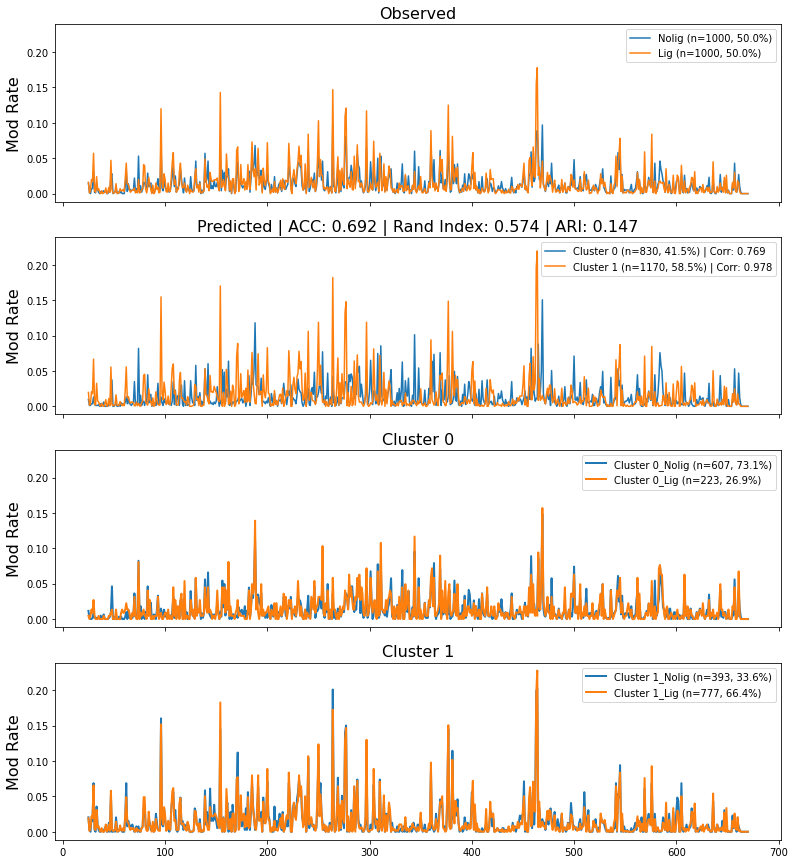

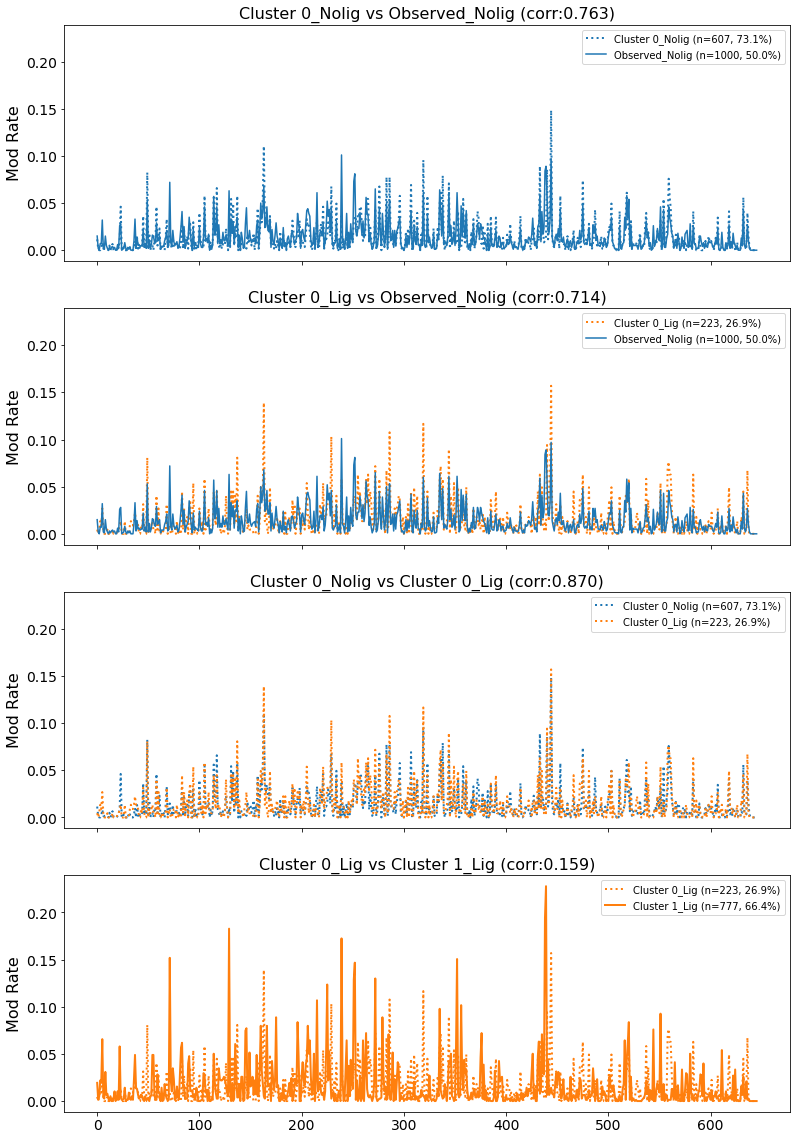

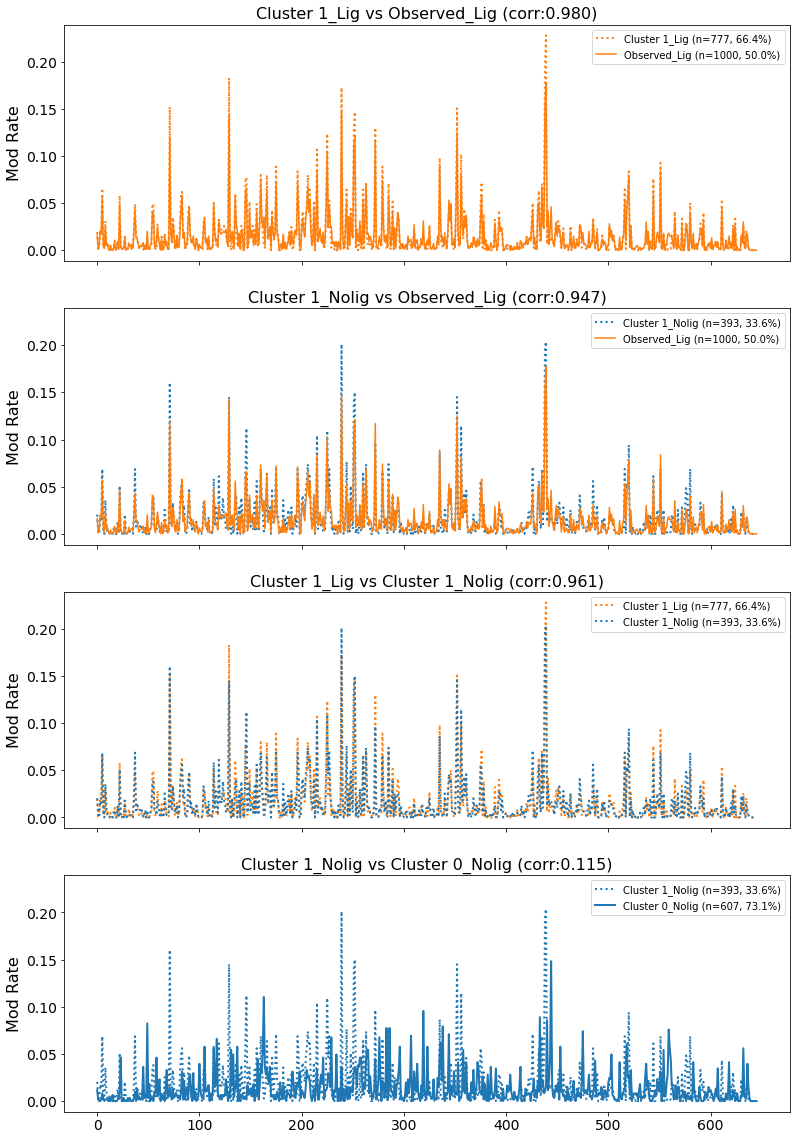

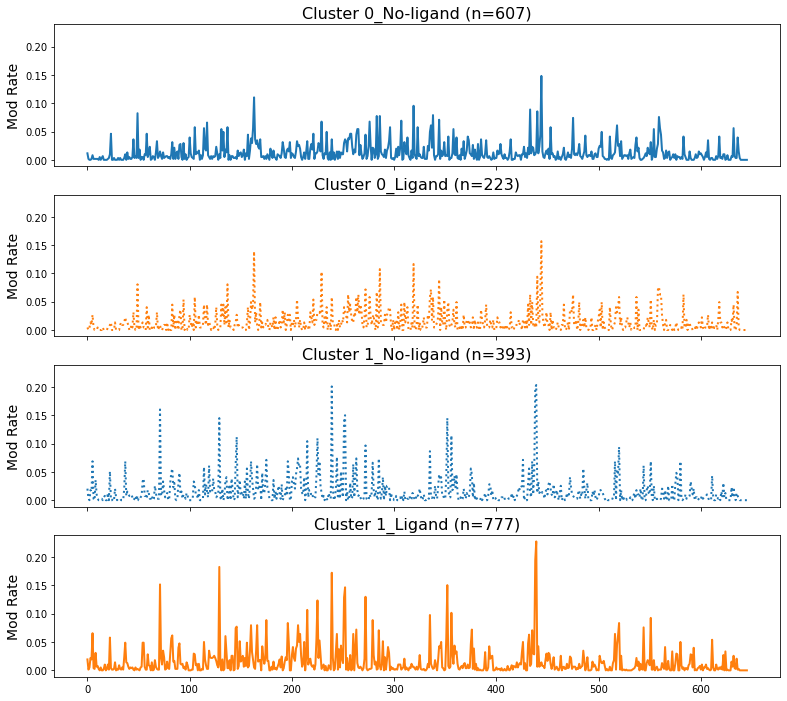

In [12]:
BMM_plots_truncate_mod_0_flip("GUA1", "GUA1",1000, 0.5) 

(120837, 3)
120837
(122011, 3)
122011
25 322 75638 64437
64437
(116295, 297)
(64437, 297)
(64437, 297)
(120837, 3)
120837
(122011, 3)
122011
0 347 75638 64437
64437
(118445, 347)
(64437, 347)
(64437, 347)
(30745, 297) (28819, 297)
(30745, 297) (28819, 297)
(1000, 297) (1000, 297)
Current Run: 0
Best Model - Run 0
[[60.3034134  43.25889165]
 [39.6965866  56.74110835]]
[[43.25889165 56.74110835]
 [60.3034134  39.6965866 ]]
43.25889164598842 43.25889164598842 0.5
56.74110835401158 100.0 0.5
60.30341340075853 60.30341340075853 1.5
39.69658659924147 100.0 1.5
2000
WT: 791 | MT: 1209 | UN: 0
UN WT: 0 | UN MT: 0
(477, 347)
(314, 347)
(686, 347)
(523, 347)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7789: Sett

(477, 347)
(314, 347)
(686, 347)
(523, 347)
Counter({True: 477, False: 314})
Counter({True: 686, False: 523})
0.5815
(477, 347)
(314, 347)
(686, 347)
(523, 347)
0.8541295403392406
0.6877949771891841
0.708690686349593
0.6604541805934756
0.9720402305874848
0.8112366243531606
0.8497500037400784
0.5364761220892705


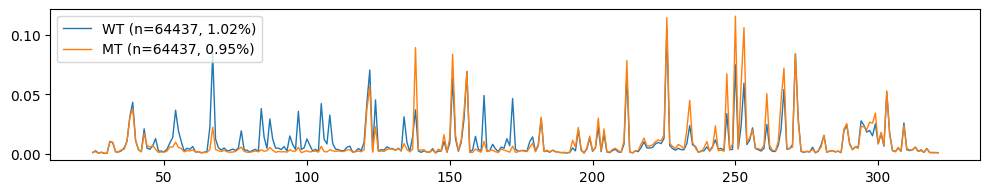

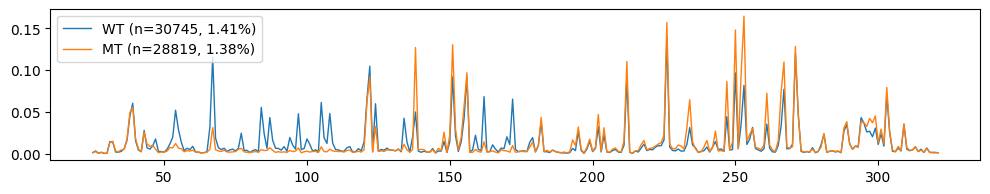

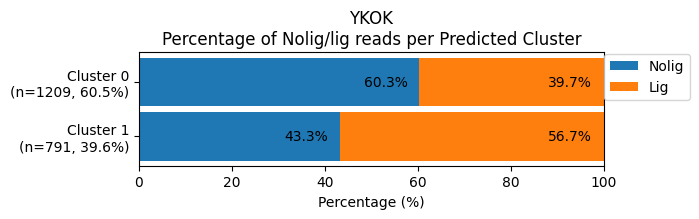

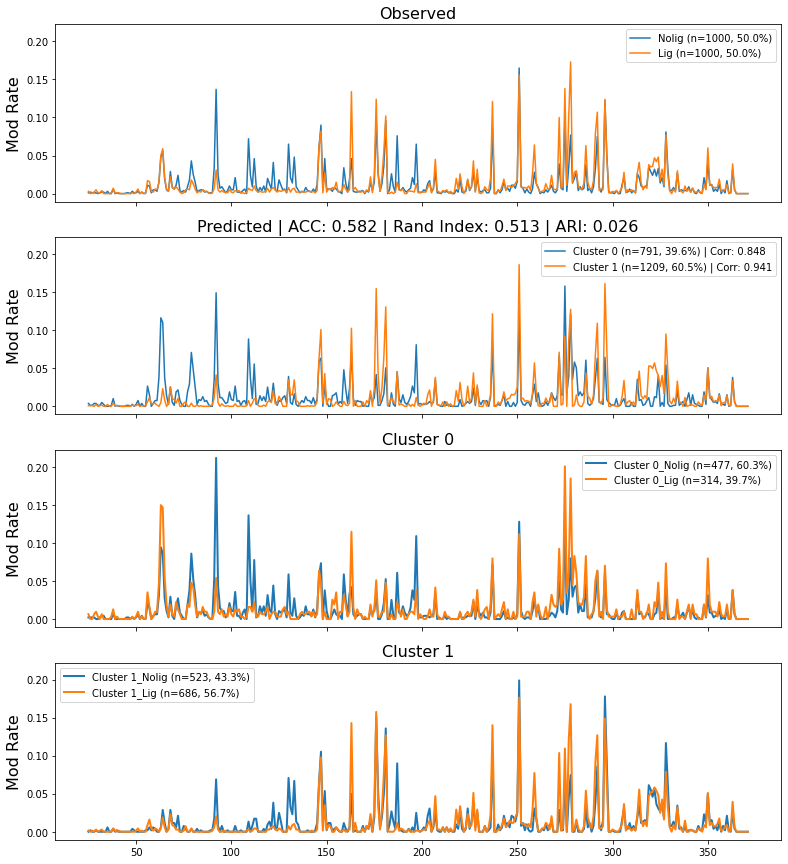

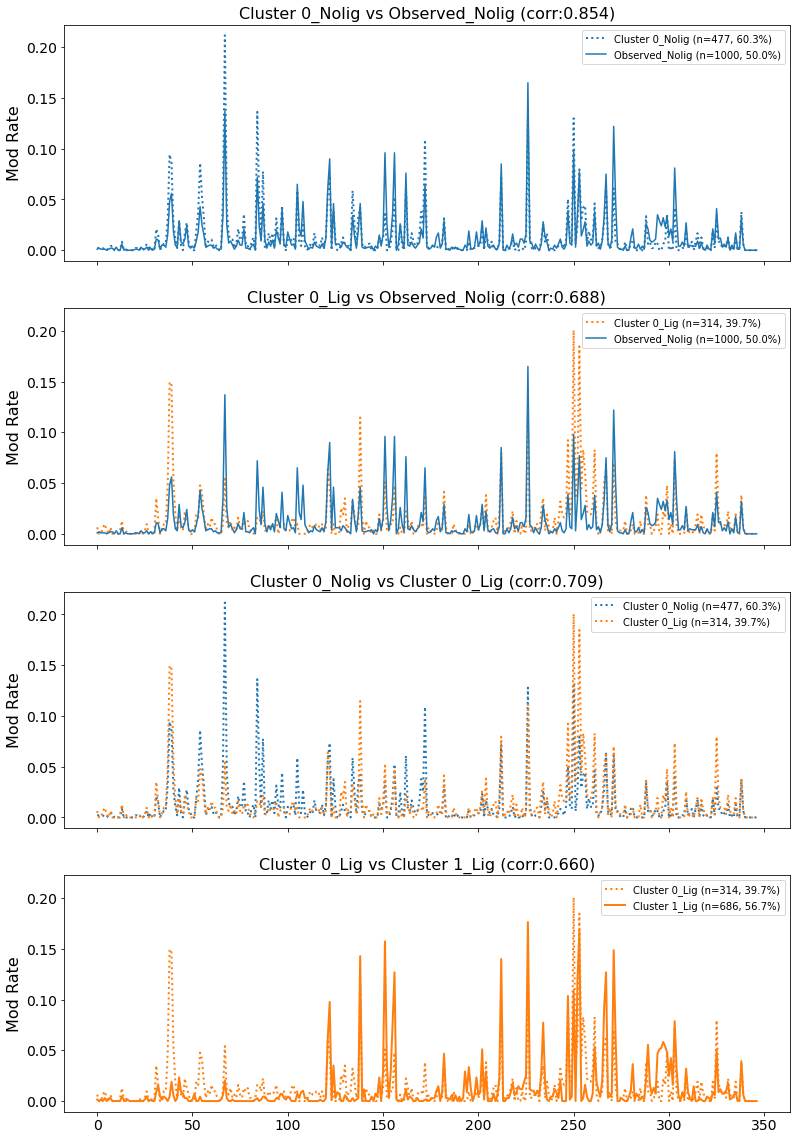

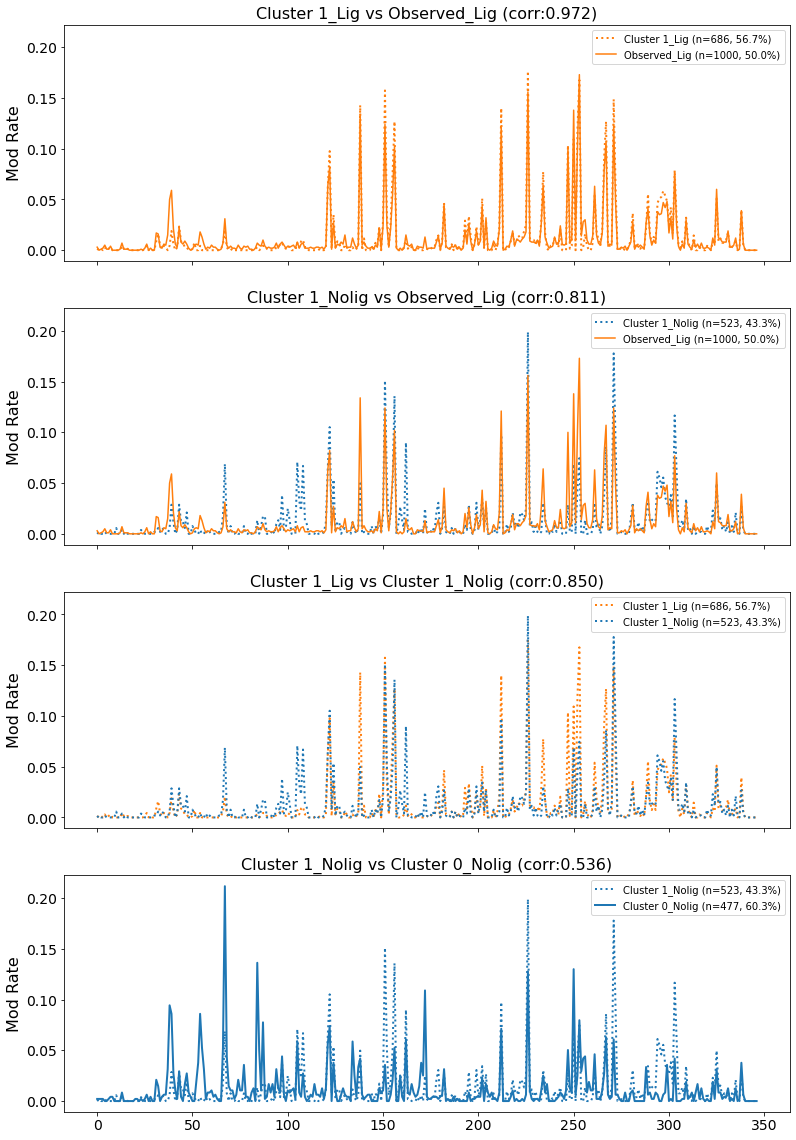

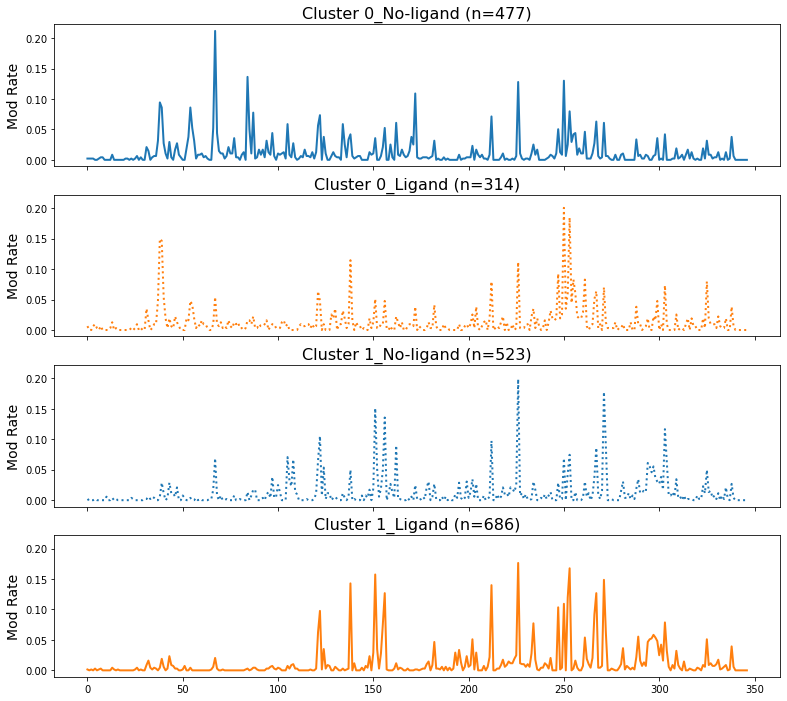

In [13]:
BMM_plots_truncate_mod_0_flip("YKOK", "YKOK",1000, 0.5) 
